# Support vector regression

**In this notebook you're going to work with SVR model**

At the end of the notebook you'll see how SVR can boost the regression task

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### A simple nonlinear function
The aim is to create some synthetic data which is not very amenable for linear regression models.

In [52]:
def target_func(array):
  '''
  This is a function which you should implement a very simple non-linear function to apply on our inputs to generate outputs of our model
  (We're going to estimate this function in this notebook)
  The formula for our model is as follow:
    (10*X1 - exp(0.01*X2 + log(1 + X3 ^ 2))) / (X4 ^ 2 + 5)
  Please implement the above function with numpy lib.
  consider the below links:
    https://numpy.org/doc/stable/reference/generated/numpy.exp.html
    https://numpy.org/doc/stable/reference/generated/numpy.log.html
  Arguments:
    input: 
      array: an array of inputs of n*4 where n is our data and 4 is features
    output:
      the calculated function
  '''
  return (10 * array[:, 0] - np.exp(0.01 * array[:, 1] + np.log(1 + array[:, 2] ** 2))) / (array[:, 3] ** 2 + 5)

### Generate features and target data for regression

In [53]:
n_samples = 200
n_features = 4

In [54]:
'''
Generate n_samples random uniform samples with n_features over [0, 5)
Hint: consider the below link: 
https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
'''
x = 5*np.random.rand(n_samples, n_features)

In [55]:
'''
Apply non-linearity you implemented above to our data then add a random uniform distributions over [0, 1)
Hint: consider the below link: 
https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
'''
y = target_func(x)+np.random.randn(n_samples)

In [56]:
y = y.reshape(n_samples, 1)

In [57]:
'''
Make dataset of the our data.
Please use a pandas dataframe
In the dataframe, 4 first columns are our features (x) and the last column is target (y)
Hint:
  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
'''
df = pd.DataFrame(data=np.hstack((x,y)),columns=['X1','X2','X3','X4','y'])

In [58]:
df.head()

,X1,X2,X3,X4,y
0,2.083097,4.126694,4.369205,1.691514,-0.489934
1,3.027705,2.213608,0.999272,3.068559,0.743303
2,3.845494,2.313595,1.165914,1.975704,3.560990
3,1.090532,3.592377,4.122323,4.196192,-1.451408
4,1.228860,3.807124,2.579124,2.367929,1.699110


### Plotting the data

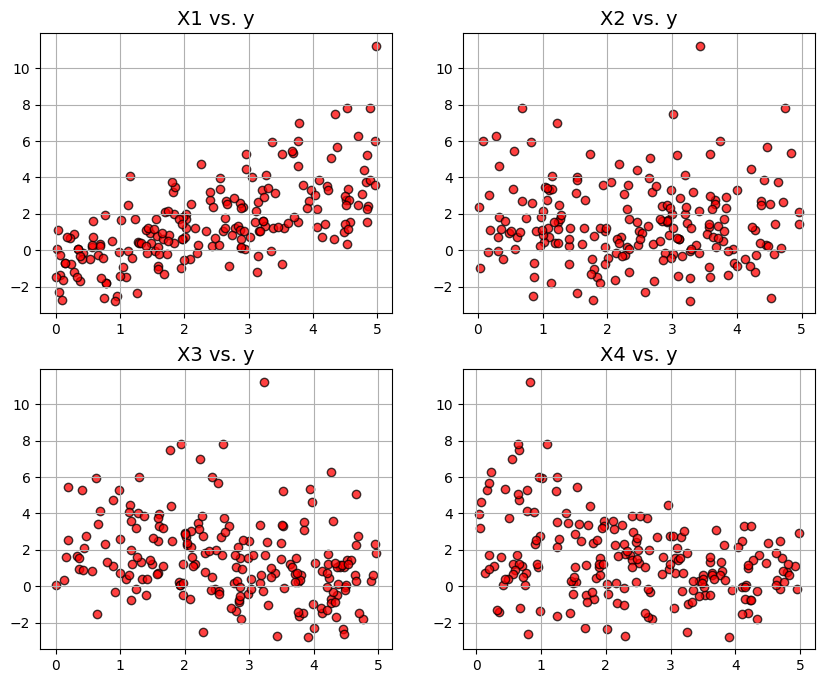

In [59]:
'''
Please plot the generated target values against all features.
For this, make a sub-plot and then containing 4 sections
Then plot target value (y) as a function of each feature (Xi)
Hint:
  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
'''

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(df[df.columns[i]],df['y'],edgecolor='k',color='red',alpha=0.75)
    ax[i].set_title(f"{df.columns[i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

### Test/train split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
'''
First extract features and target value from the pandas dataset then, split data with a suitable ratio between train and test
Hint:
  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
'''

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Linear regression as a baseline

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
'''
Define a linear regression model and fit to our data.
We will use this function as our baseline model.
Hint:
  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
'''

linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [64]:
"print the score of the model on test data"

print(linear.score(X_test,y_test))

0.6411731437985351


### Support vector regressor with linear kernel

Hint: 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [67]:
'''
First of all please define a SVR with **linear kernel** and default values for other arguments and the fit to our data
Please report the final score on test data and comparision with our linear regression model
Hint:
  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
'''
from sklearn.svm import SVR


from sklearn.svm import SVR
svr_linear = SVR(kernel='linear', gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train.ravel()) 
print(svr_linear.score(X_test,y_test))

0.6055594608826725


### Support vector regressor with Gaussian (radial basis function) kernel

In [68]:
'''
First of all please define a SVR with **RBF kernel** and default values for other arguments and the fit to our data
Please report the final score on test data and comparision with previous models
Hint:
  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
'''

svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train.ravel()) 
print(svr_rbf.score(X_test,y_test))

0.6921094902674787


So, clearly, the RBF kernel showed better accuracy on the test set

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
'''
Report M.S.E. for all models and compare them
Hint:
  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
'''

print("linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
print("RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test))))

linear SVR: 1.4695731586669836
RBF kernelized SVR: 1.298370353934696


### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
'''
Do grid search for tuning better hyperparameters
We will search for better C and epsilon in this search, so define parameters and their range as your own 
and establish the search.
Please search for SVR model with RBF kernel.
set crossvalidation to 5 
and use the r2 scoring function
for having a better intuition, retunr the train score 
Hint:
  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
'''

params = {'C' : [0.01, 0.05, 0.1, 0.5, 1, 2, 5], 'epsilon':[0.1, 0.2, 0.5, 1]}
grid = GridSearchCV(svr_rbf, param_grid=params, cv=5, scoring='r2', verbose=1, return_train_score=True)
grid.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

### Check which was deemed best estimator by the grid search

In [73]:
grid.best_estimator_

SVR(C=2)

### Fit that estimator to the data and see

In [74]:
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.5)
svr_best.fit(X_train, y_train.ravel())
svr_best.score(X_test,y_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

RMSE: 1.1898673281732162
